In [1]:
# This allows multiple outputs from a single jupyter notebook cell:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

---
<a name="mcoverride"></a>
# Coloring Individual Candlesticks

- Users can **color one or more specific candlesticks (or ohlc bars) differently than others**.
  - Users may choose to do this in order to highlight a specific pattern or technical signal.


- The **`marketcolor_overrides` kwarg** is used to specify individual candle colors.


- **`marketcolor_overrides`** must be set it to an interable (`list`,`tuple`,`ndarray`) **that is the *same length as the dataframe*** being plotted.
  - The simplest way to do this is to create a "marketcolor overrides" column in the dataframe.


- **Rows where the user wants to override the candle color must contain a "color-like" object:**
  - Examples of color-like objects include:
    - a **string** such as `'yellow'` or `'#ffff00'`
    - an **rgb or rgba tuple** such as `(1.0, 1.0, 0)` or `(1.0, 1.0, 0, 0.75)`, or `(255, 255, 0)` or `(255, 255, 0, 0.75)`
    - an **mplfinance marketcolor object**, created with `mpf.make_marketcolors()`


- **Rows where the user does *NOT* want to override** the candle color ***MUST*** contain **`None`** values.

---
---

### To illustrate, we will first give simple examples using just a few candles.
### This is followed by examples using more realistic, larger, data sets:



In [2]:
%matplotlib inline
import pandas as pd
print('pandas version=',pd.__version__)

import mplfinance as mpf
print('mplfinance version=',mpf.__version__)

pandas version= 1.4.2
mplfinance version= 0.12.9b9


#### Start with a simple, 5-row DataFrame:

,Open,High,Low,Close,Volume
2021-10-11,131.4,133.2,131.3,132.1,19591
2021-10-12,131.9,132.7,131.3,131.4,21467
2021-10-13,132.0,133.2,131.5,131.8,20406
2021-10-14,130.9,132.7,130.6,132.1,22611
2021-10-15,131.6,131.8,130.7,131.0,22001


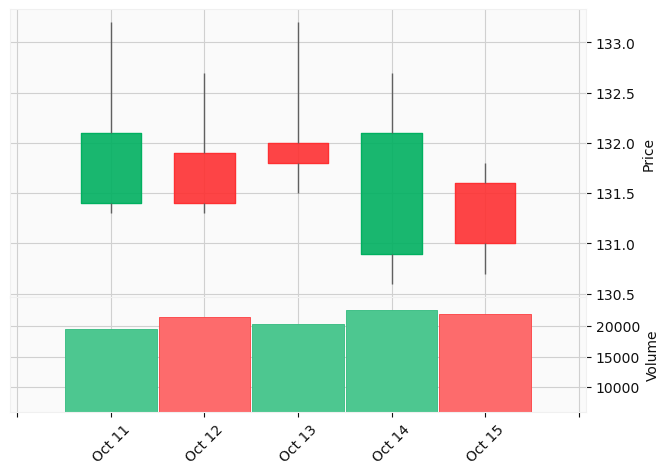

In [3]:
ix = pd.DatetimeIndex(['2021-10-11','2021-10-12','2021-10-13','2021-10-14','2021-10-15'])

df = pd.DataFrame(dict(  Open=[131.4, 131.9, 132.0, 130.9, 131.6],
                         High=[133.2, 132.7, 133.2, 132.7, 131.8],
                          Low=[131.3, 131.3, 131.5, 130.6, 130.7],
                        Close=[132.1, 131.4, 131.8, 132.1, 131.0],
                       Volume=[19591, 21467, 20406, 22611, 22001]),
                  index=ix)
df
mpf.plot(df,volume=True,style='yahoo',type='candle')

In [4]:
cmap = {True: '#4dc790', False: '#fd6b6c'}
highlow= [True, False, True, True, False]
[cmap[hl] if isinstance(False,bool) else hl for hl in highlow]

['#4dc790', '#fd6b6c', '#4dc790', '#4dc790', '#fd6b6c']

--- 

#### Suppose we want to color the third candle yellow, and the fourth candle blue.
#### Then we create a list of overrides as follows: `mco = [None,None,'yellow','blue',None]`

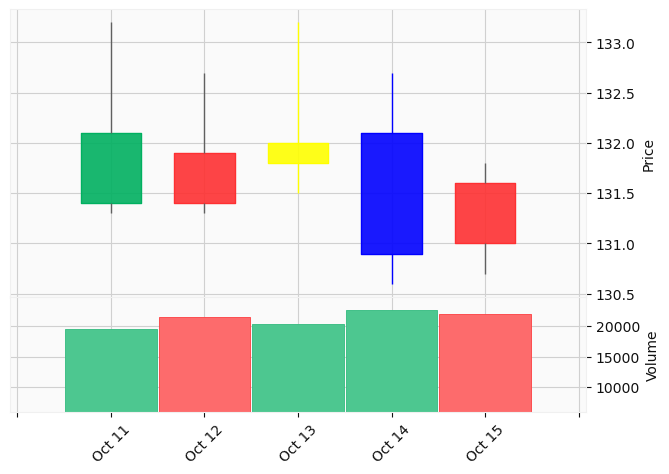

In [5]:
mco = [None,None,'yellow','blue',None]
mpf.plot(df,volume=True,style='yahoo',type='candle',marketcolor_overrides=mco)

---

#### We can change only the "face" (body) of the candle, with the `mco_faceonly` kwarg:

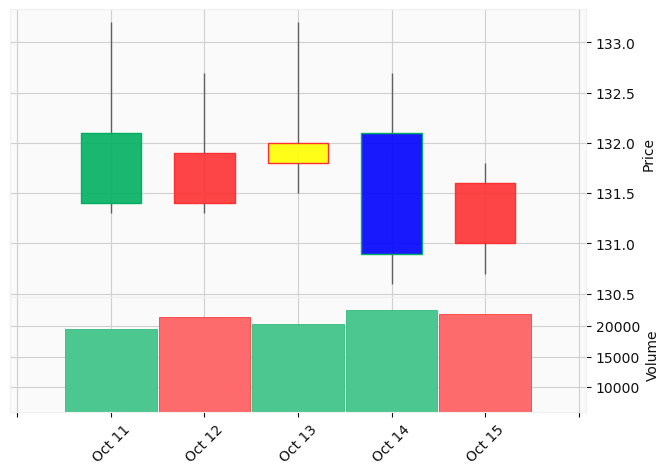

In [6]:
mco = [None,None,'yellow','blue',None]
mpf.plot(df,volume=True,style='yahoo',type='candle',marketcolor_overrides=mco,mco_faceonly=True)

---

#### marketcolor overrides work also with ohlc plots
- Presently only `type='candle'` and `type='ohlc'` are supported.
- If there is enough demand, we will consider also supporting types 'hollow_and_filled', 'renko', and 'point_and_figure'.

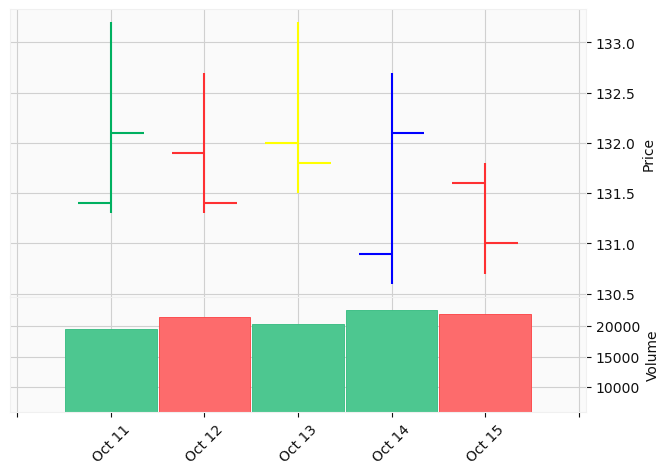

In [7]:
mco = [None,None,'yellow','blue',None]
mpf.plot(df,volume=True,style='yahoo',type='ohlc',marketcolor_overrides=mco)

---

#### We can also fully customize indivual candles using a marketcolors object.
#### Notice that with the approach, we do not have to know whether a candle is up or down;<br> a single marketcolors object can specify different colors for up candles and down candles:

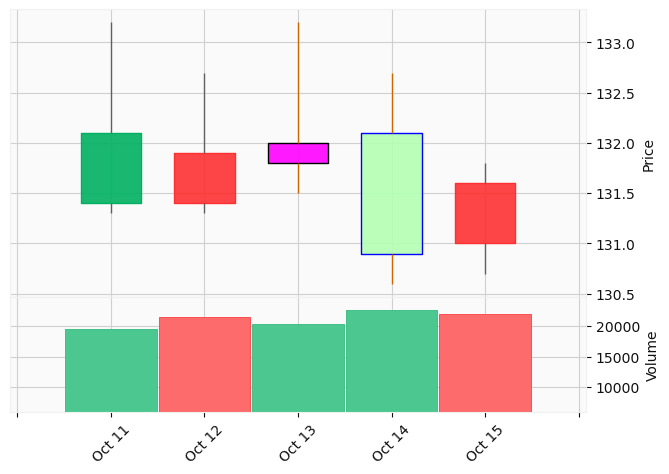

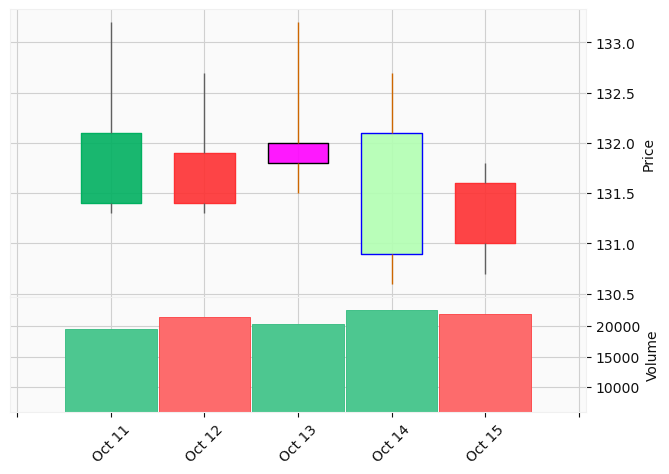

In [8]:
# ===============================================================================================
# Here we specify `up` as rgba using the matplotlib convention: rgb are floats from 0.0 and 1.0 :
mc = mpf.make_marketcolors(base_mpf_style='yahoo',up=(0.7,1.0,0.7,0.4),down='fuchsia',
                           edge={'up':'blue','down':'#000000'},wick='#cc6600')

mco = [None,None,mc,mc,None]
mpf.plot(df,volume=True,style='yahoo',type='candle',marketcolor_overrides=mco)

# ====================================================================================
# Here we specify `up` as rgba using the convention that rgb are ints from 0 and 255 :
mc = mpf.make_marketcolors(base_mpf_style='yahoo',up=(178,255,178,0.4),down='fuchsia',
                           edge={'up':'blue','down':'#000000'},wick='#cc6600')

mco = [None,None,mc,mc,None]
mpf.plot(df,volume=True,style='yahoo',type='candle',marketcolor_overrides=mco)

---

#### When dealing with larger data sets we recommend setting up your marketcolor overrides as a COLUMN in your DataFrame
#### This has two advantages:
1. It helps ensure that your marketcolor overrides are the same length as your dataframe, and
2. It allows you to use the dataframe's `DatetimeIndex` in order to position the override values.

#### Note that you will still have to pass the `marketcolor_overrides` as a separate iterable (apart from the dataframe).

---

#### Step 1: read in the data:

In [9]:
df = pd.read_csv('data/SPY_20110701_20120630_Bollinger.csv',index_col=0,parse_dates=True)
df = df[['Open','High','Low','Close','Volume']].iloc[40:90] # Arbitrarily choose a 50 row subset of the data
df.shape
df.head(3)

(50, 5)

,Open,High,Low,Close,Volume
Date,,,,,
2011-08-29,119.559998,121.430000,118.059998,121.360001,190977200
2011-08-30,120.830002,122.430000,119.260002,121.680000,241315700
2011-08-31,122.459999,123.510002,121.300003,122.220001,301828400


---

#### Step 2: Create a new column for the overrides:

In [10]:
df['MCOverrides'] = [None]*len(df)
df.head(3)

,Open,High,Low,Close,Volume,MCOverrides
Date,,,,,,
2011-08-29,119.559998,121.430000,118.059998,121.360001,190977200,None
2011-08-30,120.830002,122.430000,119.260002,121.680000,241315700,None
2011-08-31,122.459999,123.510002,121.300003,122.220001,301828400,None


---

#### Step 3: Use the DatetimeIndex to position the Overrides:
#### For demonstration purposes, let's override every Monday as black, and every Tuesday as "blueskies" marketcolors:

In [11]:
mc = mpf.make_marketcolors(base_mpf_style='blueskies')
mco=[]
for ts in df.index:
    if 0 == ts.weekday():
        #df.loc[ts,'MCOverrides'] = 'black'
        mco.append('black')
    elif 1 == ts.weekday():
        #df.loc[ts,'MCOverrides'] = [mc] 
        mco.append(mc)
    else:
        mco.append(None)
#df.head()


=== without marketcolor overrides: ===


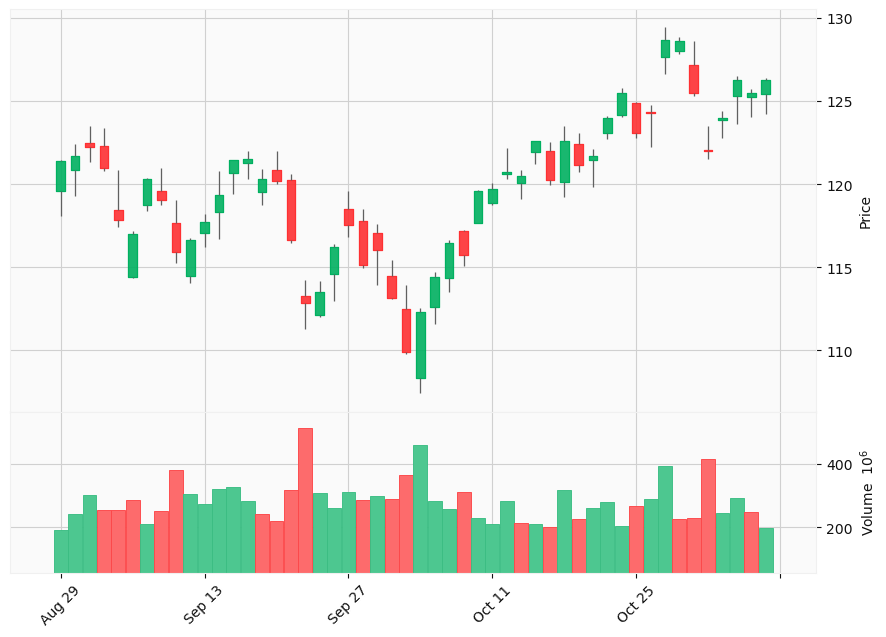


=== WITH MARKETCOLOR OVERRIDES: ===


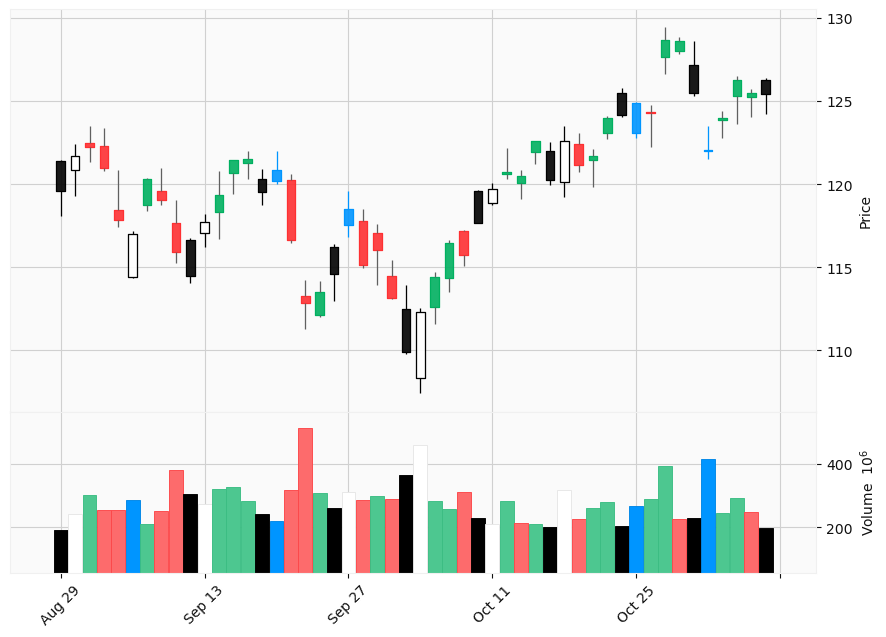

In [12]:
print('\n=== without marketcolor overrides: ===')
mpf.plot(df,volume=True,type='candle',style='yahoo',figscale=1.4)

print('\n=== WITH MARKETCOLOR OVERRIDES: ===')
#mco = df['MCOverrides'].values # idk why this doesnt work for my computer ;-;
mpf.plot(df,volume=True,type='candle',style='yahoo',marketcolor_overrides=mco,figscale=1.4,volume_mco=True)

### TO DO:
1. `marketcolor_overrides` should affect volume *when the override is a marketcolor object* that includes a 'volume' key.
2. support `marketcolor_overrides` in **`mpf.make_addplot()`**
3. support "hollow and filled" candles (both `mpf.plot()` and `mpf.make_addplot()`).
4. support renko and point-and-figure.  This may be tricky (since one "box" may cover more and/or less than one date).  Also, is support for marketcolor overrides even needed for renko and pnf? (find out from those who commonly use them).